In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt


In [2]:
PATH='Capital letters'
train_dir = os.path.join(PATH, 'Training')
validation_dir = os.path.join(PATH, 'Testing')

In [3]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 34
IMG_WIDTH = 34

In [4]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [5]:
class_names=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           classes=list(class_names))

Found 5500 images belonging to 26 classes.


In [6]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              classes=list(class_names))

Found 1331 images belonging to 26 classes.


In [7]:
sample_training_images, labels = next(train_data_gen)

In [8]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(15,15))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

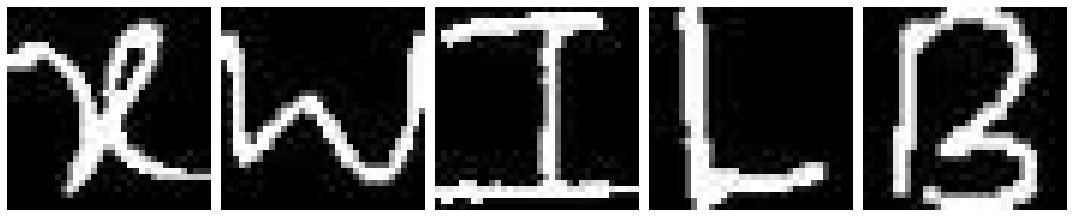

In [9]:
plotImages(sample_training_images[:5])

In [14]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(26)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 34, 34, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 17, 17, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)             

In [17]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=5500 // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=1331 // batch_size
)

Epoch 1/15
42/42 [==============================] - 47s 1s/step - loss: 0.2145 - accuracy: 0.9615 - val_loss: 0.1416 - val_accuracy: 0.9615
Epoch 2/15
42/42 [==============================] - 8s 185ms/step - loss: 0.1093 - accuracy: 0.9653 - val_loss: 0.0615 - val_accuracy: 0.9768
Epoch 3/15
42/42 [==============================] - 9s 206ms/step - loss: 0.0529 - accuracy: 0.9822 - val_loss: 0.0303 - val_accuracy: 0.9902
Epoch 4/15
42/42 [==============================] - 8s 197ms/step - loss: 0.0352 - accuracy: 0.9887 - val_loss: 0.0217 - val_accuracy: 0.9925
Epoch 5/15
42/42 [==============================] - 8s 200ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.0177 - val_accuracy: 0.9945
Epoch 6/15
42/42 [==============================] - 10s 242ms/step - loss: 0.0209 - accuracy: 0.9934 - val_loss: 0.0143 - val_accuracy: 0.9952
Epoch 7/15
42/42 [==============================] - 8s 189ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.0128 - val_accuracy: 0.9963
Epoch 8

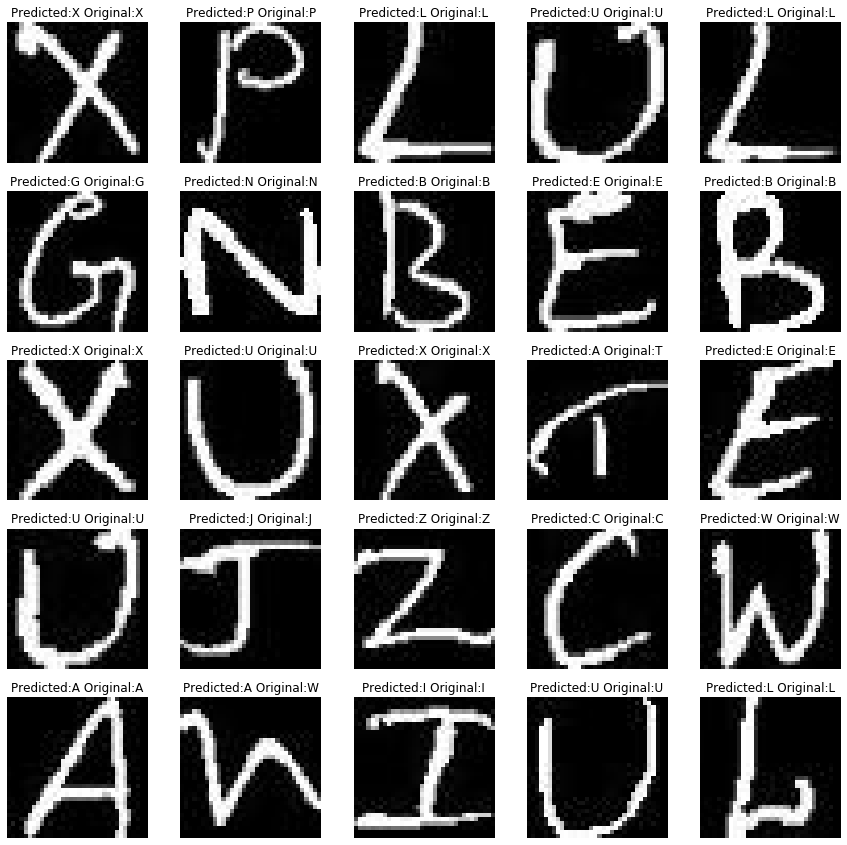

In [18]:
def findMax(p):
    max_indx=0
    max_value=0
    for i in range(len(p)):
        if max_value<p[i]:
            max_value=p[i]
            max_indx=i
    return max_indx

image_batch, label_batch = next(val_data_gen)
pred=model.predict(image_batch)
plt.figure(figsize=(15,15))
for n in range(25):
      ax = plt.subplot(5,5,n+1)
      plt.imshow(image_batch[n])
      plt.title("Predicted:"+class_names[findMax(pred[n])]+" Original:"+class_names[int(findMax(label_batch[n]))])
      plt.axis('off')

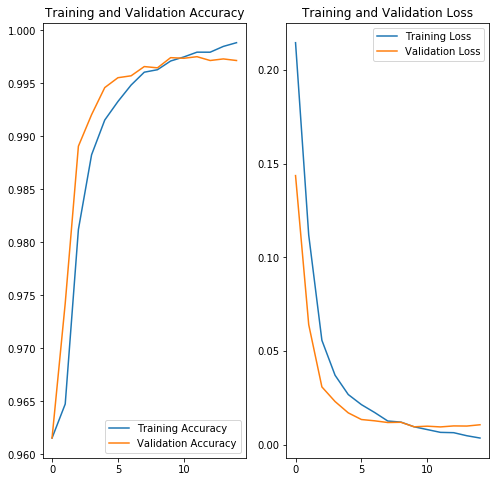

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [17]:
model.save("first_cnn_model.h5")